# Value at Risk

A definição pode ser resumida pela seguinte frase:
"Nós temos X por cento de confiança que não perderemos mais que V dolares nos proximos N dias."
Onde o valor V é o verdadeiro valor do value at risk do portfolio. 

Pode ser escrita como uma função de dois parametros: N, o horizonte de tempo e X, o nivel de confiança. Ou então como a perda em valor monetario do (100-X)º percentil da curva de distribuição.

## Simulação 

Abordagem de variância e covariancia.

### Volatilidade diária

$$ \sigma_{yr} = \sigma_{day}*\sqrt{252} \tag{1}$$
Onde $\sigma_{day}$ é aproximadamente igual ao desvio padrão da variação percentual diaria no preço do ativo. 

### Caso de dois ativos

$$ \sigma_{X+Y} = \sqrt{\sigma_{X}^2+\sigma_{Y}^2+2\rho\sigma_{X}\sigma_{Y}}\tag{2}$$

Pela curva de distribuição normal em Z, deve-se buscar o valor do desvio padrão correspondente a um intervalo de confiança $\alpha$ em que se esteja interessado. Após isso, o calculo do VaR se dá por:

$$ VaR_{\alpha} = std_{alpha}(Z)*\sqrt{N} \tag{3}$$

A diferença a seguir representa o beneficio, em termos de risco, da diversificação do portifolio:

$$ \sigma_{X}+\sigma_{Y}-\sigma_{X+Y} \tag{4}$$

No caso em que os dois ativos são perfeitamente correlacionados, o VaR do portfolio com ambos os ativos X e Y se igualaria a soma do VaR de dois portifolios com os ativos separados. 

### Modelo linear

Suponha um portfolio com $n$ ativos com um **valor monetario** $\alpha_{i}$ investida em cada um deles. Seja $\delta x_{i}$ o retorno percentual do ativo *i* em um dia. A variação do valor do portfolio em um dia é dada por:

$$ \delta P = \sum^n_{i=1} \alpha_{i}\delta x_{i} \tag{5}$$

Então, assumindo uma distribuição normal com média zero, para calcular o VaR basta obtermos o desvio padrão do portfolio. 

$$ \sigma^2_{P} = \sum^n_{i=1} \sum^n_{j=1} \rho_{ij} \alpha_{i} \alpha_{j} \sigma_{i} \sigma_{j} \tag{6}$$

A equação acima pode também ser escrita como:

$$ \sigma^2_{P} = \sum^n_{i=1} \alpha_{i}^2 \sigma_{i}^2 + 2\sum^n_{i=1}\sum_{j<i} \rho_{ij} \alpha_{i} \alpha_{j} \sigma_{i} \sigma_{j} \tag{7}$$

Então, o desvio padrão para um horizonte de N dias é dado por $\sigma_{p} \sqrt{N}$ e o VaR com 99% de confiança para o mesmo horizonte é $2.33\sigma_{P} \sqrt{N}$.

O segundo termo da equação *(7)* pode ser eliminado com diversificação no portifolio. O primeiro termo nunca será eliminado e pode ser chamado de **risco sistêmico do mercado.**

#### Modelos para taxas de juros

Variações no valor de um titulo podem ser calculadas por:

$$ \delta P = - D*P*\delta y \tag{8} $$

No entanto, essa solução aproximada não dá muita precisão para valores maiores de $\delta y$. Um metodo proposto é o *cash-flow mapping*.

#### Cash-flow mapping

Para calcular o VaR de taxas de juros, o preço do titulo é decomposto em fluxo de caixas com taxas de maturidades padrão (1 mês, 3 meses, 6 meses, 1 ano, 2 anos, 10 anos...). Por exemplo, um titulo de maturidade de 1.2 anos pode ser interpretado como uma posição em dois titulos, um de maturidade de 1 ano e outro de maturidade de 2 anos. 

Então, fluxos de caixas com maturidades diferentes podem ser decompostos como posição em dois titulos que possuam maturidade que seja possivel criar o primeiro. Por exemplo: um titulo de 0.8 anos com cupom semi-anual paga cupons em 0.2 anos e 0.8 anos. O fluxo de caixa de maturidade de 0.2 anos pode ser decomposto como uma posição em dois titulos: um de maturidade de 3 meses e outro de 6 meses. Sendo que a posicao em cada um deles é de X % e (1-X)% do fluxo de caixa na data de 0.2 anos. Através dos dados de mercado de taxa de cupom-zero, volatilidade diaria e correlação para as maturidades de 3 meses, 6 meses e 1 ano que estamos "decompondo" o titulo é possivel calcular o desvio padrão das posições decompostas em titulos padrões. Pela equação *(7)*, encontra-se o percentual X em cada titulo que está sendo decomposto através do desvio padrão do portifolio original. 

### Monte Carlo

Usar a simulação de Monte Carlo para gerar a distribuição de probabilidade para $\delta P$. Suponha que desejamos calcular VaR para 1 dia de um portfolio. Os steps seriam:

- 1) Calcular o valor do portifolio com os atuais valores de mercado
- 2) Fazer um sample da distribuição multivariada normal de $\delta x_{i}$
- 3) Usar o valor de $\delta x_{i}$ que foi obtido com o sample para calcular o novo valor da variavel $x$
- 4) Calcular o valor do portfolio no fim do dia com o novo valor de x.
- 5) Fazer a diferença entre o valor do portfolio calculado em *1)* e o calculado em *4)*
- 6) Repetir os passos de *2)* a *5)* quantas vezes forem necessarias para construir a distribuição de $\delta P$

Suponha que calculamos 5000 valores diferentes para $\delta P$ do jeito descrito. Então o VaR de 1 dia com 99% de confiança é o 50º pior resultado encontrado. 

#### Modelando...

Suponha que o valor do ativo siga a seguinte equação:

$$ dS = \mu Sdt + \sigma SdW_{t} \tag{9} $$

Como $\mu = 0$, então:

$$ \frac{dS}{S} = \sigma dW_{t} \tag{9} $$
Onde:
$$ dW_{t}= \epsilon \sqrt{\delta t} \tag{10} $$

Como é mais preciso simular $ln S$ ao invés de $S$, do lema de Itô segue que:

$$ dlnS = (\mu - \frac{\sigma^2}{2})dt + \sigma dW \tag{11}$$
$$ \frac{S(t + \delta t)}{S(t)} = e^{(\mu - \frac{\sigma^2}{2}) \delta t + \sigma \epsilon \sqrt{\delta t}} \tag{12}$$

Onde:
- $\epsilon$ é uma amostra aleatoria da curva normal com média zero e desvio padrão 1
- $\sigma$ é a volatilidade
- $dW$ é um processo de Wiener

A diferença entre as equações se concentra na diferença em que a equação (10) é valida apenas para $\delta t$ tendendo a zero. Enquanto a equação (12) vale para qualquer intervalo de tempo. $ lnX \sim X$  quando $x<<0$, seguindo isso facilmente chega-se a equação *(9)*.

Para simular, é necessário fazer um sample da distribuição normal e em seguida calcular o valor da imagem da função inversa da soma acumulativa da densidade de probabilidade.

### Stress test

Teste de estress envolve calcular como o portfolio teria performado nos movimentos mais extremos do mercado vistos nos ultimos 10 a 20 anos. Por exemplo, para testar o impacto de um movimento extremo no preço dos ativos brasileiro, o gestor pode setar as variações percentuais dos preços do portfolio iguais ao do dia 12 de março de 2020, ou no Joeslay Day. 

Esse tipo de teste é uma maneira de considerar movimentos muito extremos do mercado, dado que com a distribuição de probabilidade construida não é possivel obter esses valores. 

### Backtest

Estimar como o VaR teria performado no passado. Exemplo para testar o VaR de 1 dia a 99%: calcular com qual frequência a perda de um determinado dia supera o VaR calculado para o mesmo dia. Se isso acontecer em torno de 1% das vezes pode-se sentir confortavel com a metodologia adotada. Agora, se acontece em 10% dos dias, algo está errado.

In [1]:
import yfinance as yf

import scipy.stats as st

import numpy as np

import matplotlib.pyplot as plt

In [2]:
tickers_list = ['ALSO3', 'BBAS3', 'CPFE3', 'ITUB4', 'IVVB11', 'MGLU3', 'RDOR3', 'SMAL11', 'SUZB3', 'TXSA34', 'VALE3']

In [3]:
composition_prices = [442.7131,
                     813.2362999999999,
                     507.915,
                     304.2758,
                     2648.9053000000004,
                     670.1771,
                     1031.6766,
                     865.6179,
                     805.5331,
                     892.6891,
                     1017.2606]

In [4]:
class Portfolio():
    
    def __init__(self, tickers, assets_values):
        self.tickers = tickers
        self.assets_values = assets_values
        self.portfolio_value = np.sum(assets_values)
        self.weights = [np.round(asset_value/self.portfolio_value, 3) for asset_value in assets_values]
        self.returns = self.historicalReturn(self.tickers)
        
    def historicalReturn(self, tickers):
        prices = yf.download([f'{stock}.SA' for stock in self.tickers], start='2019-01-01', group_by='column')[['Close']]
        returns = prices.pct_change().fillna(0)
        returns.columns=self.tickers
        
        return returns 


In [5]:
portfolio = Portfolio(tickers_list, composition_prices)

[*********************100%***********************]  11 of 11 completed


In [7]:
returns = portfolio.returns

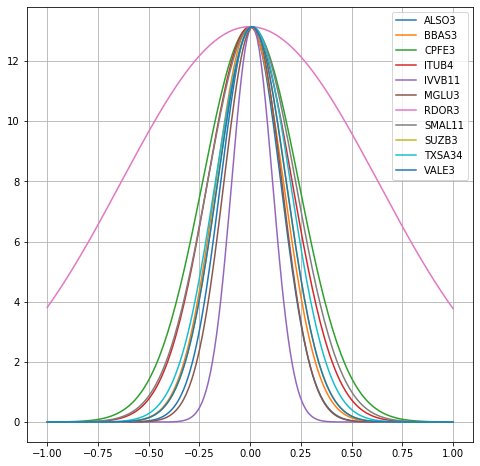

In [8]:
plt.figure(figsize=(8,8))   
for stock in tickers_list:
    pdf_list = []
    for x in np.linspace(-6*returns.std()[stock], 6*returns.std()[stock], 200):
        pdf_list.append(st.norm.pdf(x, returns.mean()[stock], returns.std()[1]))

    plt.plot(np.linspace(-1, 1, 200), pdf_list, label=stock)
plt.legend()
plt.grid()
plt.show()

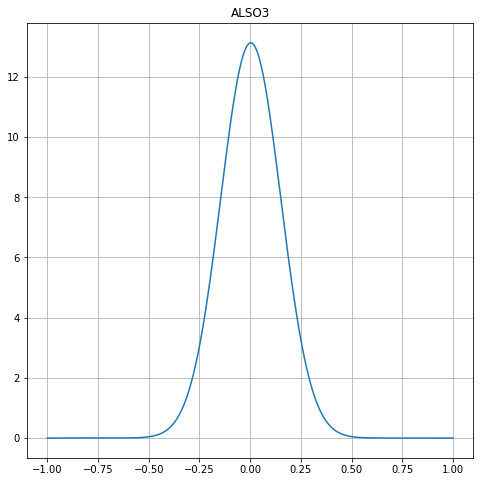

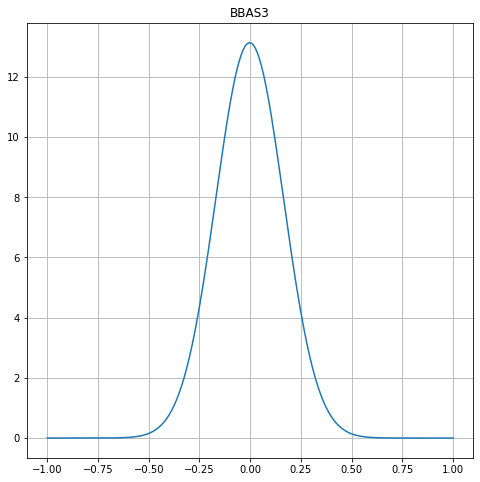

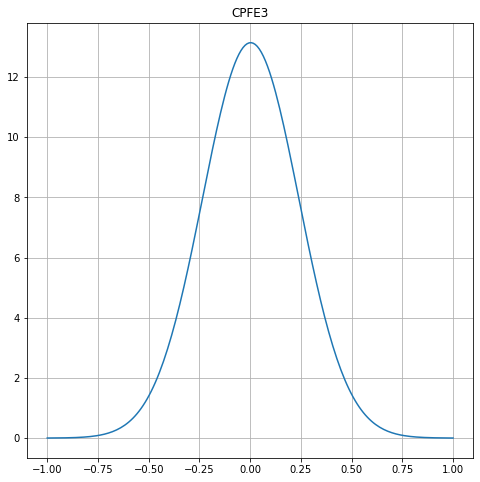

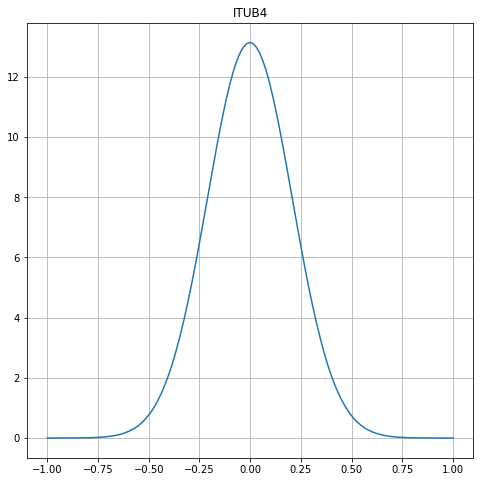

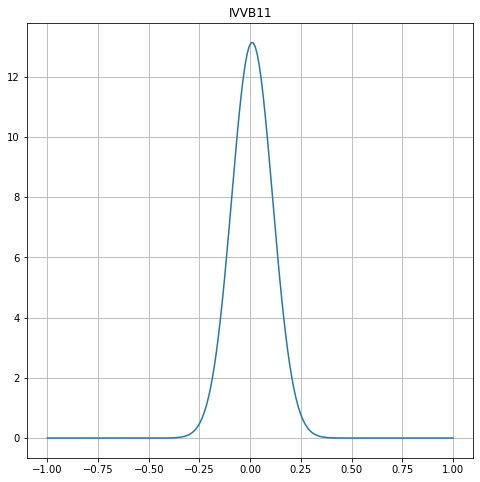

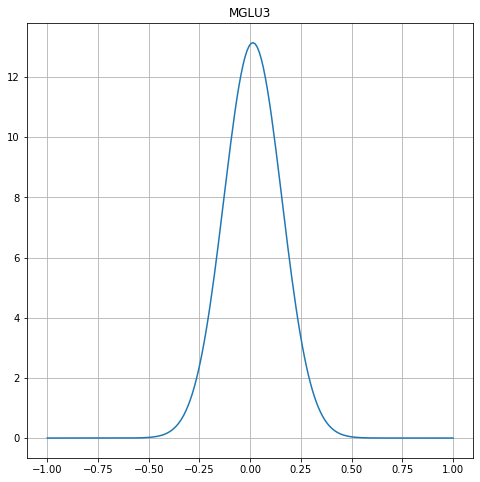

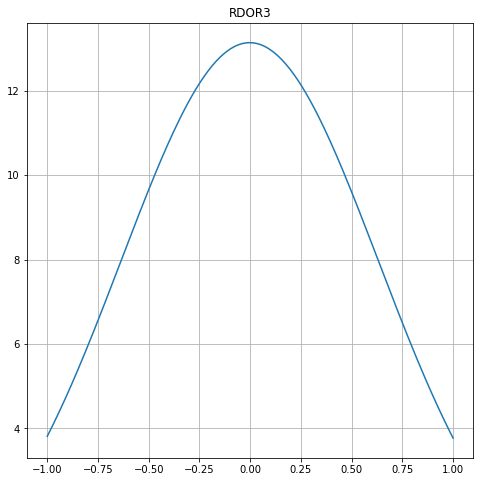

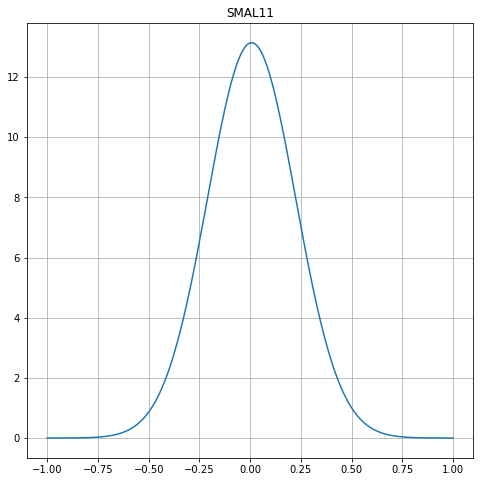

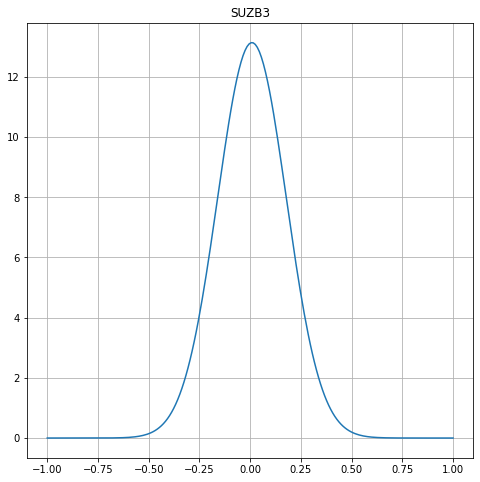

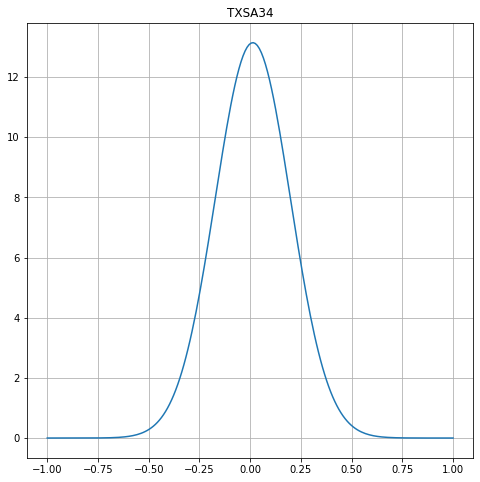

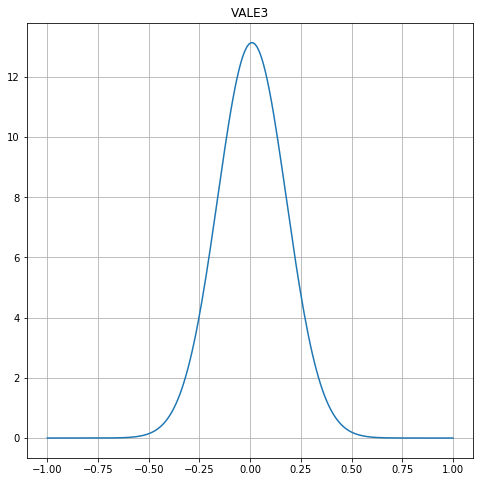

In [9]:
for stock in tickers_list:
    pdf_list = []
    for x in np.linspace(-6*returns.std()[stock], 6*returns.std()[stock], 200):
        pdf_list.append(st.norm.pdf(x, returns.mean()[stock], returns.std()[1]))

    plt.figure(figsize=(8,8))    
    plt.plot(np.linspace(-1, 1, 200), pdf_list)
    plt.grid()
    plt.title(stock)
    plt.show()

In [10]:
class RiskUtils():
    @staticmethod
    def valueAtRisk(initial_value, std, alpha=0.99, N=1):
        return abs(initial_value * st.norm.ppf(1-alpha) * std * np.sqrt(N))
    
    @staticmethod
    def valueAtRiskForNAssets(initial_value, asset_percentage, std, rho, alpha = 0.99, N = 1):
        if len(asset_percentage) != len(std):
            raise ValueError('Length of variables is wrong')

        number_of_assets = len(asset_percentage)

        sum_list = []

        for i in range(number_of_assets):
            for j in range(number_of_assets):
                sum_list.append(rho[i][j]*asset_percentage[i]*asset_percentage[j]*std[i]*std[j])

        variance_p = np.sum(sum_list)
        std_p = np.sqrt(variance_p)

        return RiskUtils.valueAtRisk(initial_value, std_p, alpha, N)
    
    @staticmethod
    def historicalValueAtRisk(initial_value, return_vector, alpha = 0.99, N = 1):
        return abs(initial_value * np.percentile(return_vector, (1 - alpha)*100) * np.sqrt(N))

    @staticmethod
    def mcReturns(std, n_simulations):
        simulated_returns = []
        for _ in range(n_simulations):
            uniform_random = np.random.uniform()
            normal_sample = st.norm.ppf(uniform_random)
            simulated_returns.append(normal_sample*std)

        return simulated_returns
    
    @staticmethod
    def mcVaR( initial_value, std, alpha = 0.99, N = 1, n_simulations = 10000):
        simulated_returns = RiskUtils.mcReturns(std, n_simulations)
        return RiskUtils.historicalValueAtRisk(initial_value, simulated_returns, alpha, N)

In [11]:
class RiskManager(RiskUtils):
    
    def __init__(self, Portfolio):
        self.portfolio = Portfolio
        self.portfolio_var = self.valueAtRiskForNAssets(self.portfolio.portfolio_value, self.portfolio.weights, self.portfolio.returns.std().values, np.array(self.portfolio.returns.corr()), N=1)
        self._gen_assets_var()
        
    def get_portfolio_var(self):
        print(f'Portfolio 1-day 99% V@R is {self.portfolio_var:.2f}')
    
    def get_assets_mc_var(self):
        self._gen_assets_mc_var()
        
        return self.mc_assets_var
        
    def _gen_assets_var(self):
        self.assets_var = {}
        for i in range(len(self.portfolio.tickers)):
            self.assets_var[self.portfolio.tickers[i]]= self.valueAtRisk(self.portfolio.assets_values[i], self.portfolio.returns.std().values[i], N=1)

        return self.assets_var

    def _gen_assets_mc_var(self):
        self.mc_assets_var = {}
        for i in range(len(self.portfolio.tickers)):
            self.mc_assets_var[self.portfolio.tickers[i]] = self.mcVaR(self.portfolio.assets_values[i], self.portfolio.returns.std().values[i])
    
    def print_assets_var(self):
        for i in range(len(self.portfolio.tickers)):
            print(f'1-day 99% V@R for {self.portfolio.tickers[i]} is {self.assets_var[self.portfolio.tickers[i]]:.2f}')
    
    def print_assets_mc_var(self):
        self._gen_assets_mc_var()
        for i in range(len(self.portfolio.tickers)):
            print(f'1-day 99% Monte Carlo V@R for {self.portfolio.tickers[i]} is {self.mc_assets_var[self.portfolio.tickers[i]]:.2f}')
        

        

In [12]:
risk = RiskManager(portfolio)

In [13]:
risk.print_assets_mc_var()

1-day 99% Monte Carlo V@R for ALSO3 is 34.39
1-day 99% Monte Carlo V@R for BBAS3 is 57.88
1-day 99% Monte Carlo V@R for CPFE3 is 25.26
1-day 99% Monte Carlo V@R for ITUB4 is 16.88
1-day 99% Monte Carlo V@R for IVVB11 is 314.57
1-day 99% Monte Carlo V@R for MGLU3 is 55.98
1-day 99% Monte Carlo V@R for RDOR3 is 19.53
1-day 99% Monte Carlo V@R for SMAL11 is 46.07
1-day 99% Monte Carlo V@R for SUZB3 is 56.56
1-day 99% Monte Carlo V@R for TXSA34 is 56.08
1-day 99% Monte Carlo V@R for VALE3 is 71.16


In [14]:
risk.print_assets_var()

1-day 99% V@R for ALSO3 is 35.21
1-day 99% V@R for BBAS3 is 57.44
1-day 99% V@R for CPFE3 is 25.20
1-day 99% V@R for ITUB4 is 17.14
1-day 99% V@R for IVVB11 is 309.13
1-day 99% V@R for MGLU3 is 55.27
1-day 99% V@R for RDOR3 is 19.15
1-day 99% V@R for SMAL11 is 46.88
1-day 99% V@R for SUZB3 is 55.96
1-day 99% V@R for TXSA34 is 56.76
1-day 99% V@R for VALE3 is 70.74


In [15]:
risk.get_portfolio_var()

Portfolio 1-day 99% V@R is 441.90


In [16]:
print(f'1-day 99% V@R for portfolio is {RiskUtils.valueAtRiskForNAssets(portfolio.portfolio_value, portfolio.weights, portfolio.returns.std().values, np.array(portfolio.returns.corr()), N=1):.2f}')

1-day 99% V@R for portfolio is 441.90


In [17]:
for i in range(len(tickers_list)):
    print(f'1-day 99% Monte Carlo V@R for {tickers_list[i]} is {RiskUtils.mcVaR(portfolio.assets_values[i], portfolio.returns.std().values[i], N=1):.2f}')

1-day 99% Monte Carlo V@R for ALSO3 is 34.71
1-day 99% Monte Carlo V@R for BBAS3 is 58.45
1-day 99% Monte Carlo V@R for CPFE3 is 25.22
1-day 99% Monte Carlo V@R for ITUB4 is 17.22
1-day 99% Monte Carlo V@R for IVVB11 is 306.20
1-day 99% Monte Carlo V@R for MGLU3 is 55.31
1-day 99% Monte Carlo V@R for RDOR3 is 18.90
1-day 99% Monte Carlo V@R for SMAL11 is 48.88
1-day 99% Monte Carlo V@R for SUZB3 is 56.56
1-day 99% Monte Carlo V@R for TXSA34 is 56.29
1-day 99% Monte Carlo V@R for VALE3 is 70.43


In [18]:
for i in range(len(tickers_list)):
    print(f'1-day 99% V@R for {tickers_list[i]} is {RiskUtils.valueAtRisk(portfolio.assets_values[i], portfolio.returns.std().values[i], N=1):.2f}')

1-day 99% V@R for ALSO3 is 35.21
1-day 99% V@R for BBAS3 is 57.44
1-day 99% V@R for CPFE3 is 25.20
1-day 99% V@R for ITUB4 is 17.14
1-day 99% V@R for IVVB11 is 309.13
1-day 99% V@R for MGLU3 is 55.27
1-day 99% V@R for RDOR3 is 19.15
1-day 99% V@R for SMAL11 is 46.88
1-day 99% V@R for SUZB3 is 55.96
1-day 99% V@R for TXSA34 is 56.76
1-day 99% V@R for VALE3 is 70.74
